In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv2.CHAIN_APPROX_NONE:
contours[0].shape: (466, 1, 2) so number of points for the contour: 466
-----
cv2.CHAIN_APPROX_SIMPLE:
contours[0].shape: (158, 1, 2) so number of points for the contour: 158


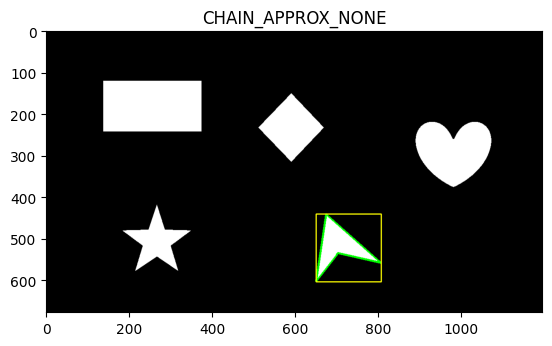

In [10]:

image = cv2.imread('images/contour_test.png', 0)
ret, thresh = cv2.threshold(image, 127, 255, 0)
idx = 0

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)  # full contours points

print("cv2.CHAIN_APPROX_NONE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[idx]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 2, (0,255,0), -1)
    boundRect = cv2.boundingRect(contours[idx])
    cv2.rectangle(bgr_image, (int(boundRect[0]), int(boundRect[1])), \
      (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)

plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_NONE')
print('-'*5)


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)   # approximates to fewer points not full contour
print("cv2.CHAIN_APPROX_SIMPLE:")
print("contours[0].shape: {} so number of points for the contour: {}".format(contours[0].shape, len(contours[0])))

bgr_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in contours[idx]:
    cv2.circle(bgr_image, (point[0][0], point[0][1]), 2, (0,255,0), -1)
    
# plt.figure(); plt.imshow(bgr_image[...,::-1]); plt.title('CHAIN_APPROX_SIMPLE')

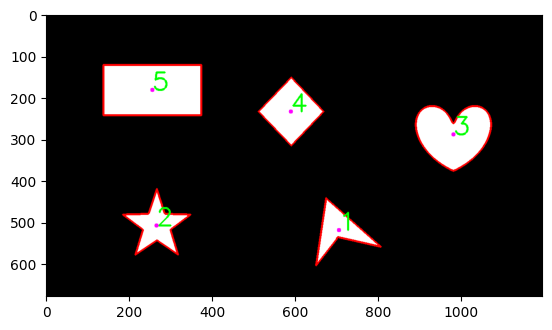

In [18]:
# Load our image
image = cv2.imread('images/contour_test.png')

# Grayscale our image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Labeling Contours left to right
for (i,c)  in enumerate(contours):
    cv2.drawContours(image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.circle(image, (cx, cy), 5, (255,0,255), -1)

plt.imshow(image[...,::-1])

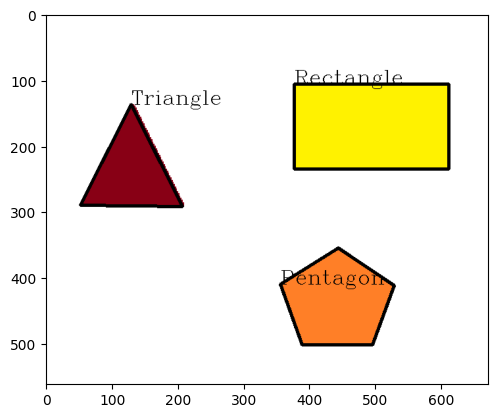

In [22]:
# Polygon Approximation using Douglas Peucker algo: approxPolyDP on contours

image = cv2.imread('images/shapes2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)
imagecontours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() 
# function and the contours are drawn in the image using drawContours() function
for c in imagecontours:
    epsilon = 0.01 * cv2.arcLength(c, True)
    approximations = cv2.approxPolyDP(c, epsilon, True)
    cv2.drawContours(image, [approximations], 0, (0), 3)
    
    #the name of the detected shapes are written on the image
    i, j = approximations[0][0] 
    
    if len(approximations) == 3:
        cv2.putText(image, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv2.putText(image, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv2.putText(image, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6 < len(approximations) < 15:
        cv2.putText(image, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv2.putText(image, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])



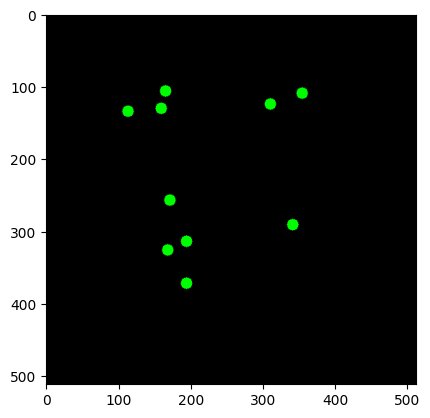

In [31]:
# convex hull

import random
np.random.seed=50
random_points = np.random.randint(100, 400, 20)
random_points = random_points.reshape(10, 2)

# Create a black image
image = np.zeros((512,512,3), np.uint8)
for point in random_points:
    cv2.circle(image, (point[0],point[1]),8,(0,255,0),-1)
    
plt.imshow(image[...,::-1])

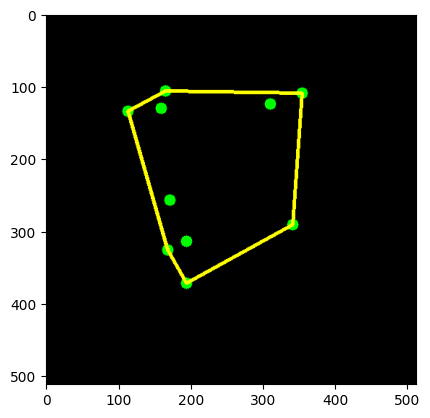

In [32]:
hull = cv2.convexHull(random_points)
cv2.drawContours(image, [hull], -1, (0,255,255), 4)
plt.imshow(image[...,::-1])